In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.patches 
from matplotlib import pylab
%matplotlib inline
URL_DOC =   "https://docs.google.com/spreadsheets/d/e/2PACX-1vQfFMHK_XVtNXex5pAPh6boF4qdBH0iB6_ndGWV"\
            "-FANyBXh1TB9MuIQ_Ex7gBlcrGOMO2Tn133NxVf1/pub?gid=0&single=true&output=csv"
print(URL_DOC)

https://docs.google.com/spreadsheets/d/e/2PACX-1vQfFMHK_XVtNXex5pAPh6boF4qdBH0iB6_ndGWV-FANyBXh1TB9MuIQ_Ex7gBlcrGOMO2Tn133NxVf1/pub?gid=0&single=true&output=csv


# Plotten der Anforderungsabhängigkeiten

In [2]:
color_map = {
    'kann': 'tomato',
    'soll': 'orange',
    'muss': 'green'
}

In [3]:
#del anforderungen
anforderungen = pd.read_csv(URL_DOC)
anforderungen

,ID,Titel,Priorität,Aktoren,Vorbedingungen,Nachbedingungen,Anmerkungen,Ablaufbeschreibung,Kurzbeschreibung
0,1,Anmeldung im System,muss,Administrator,NaN,[Im System angemeldet],NaN,NaN,Der Adminiostrator muss sich im System anmelde...
1,2,Daten aktualisieren,soll,Administrator,[Im System angemeldet],[Aktualisierte Daten liegen vor],Kombination mit [Datenbank neu einspielen],Über ein zentrales Skript wird der Adminisrato...,Die monatlich veröffentlichten Daten werden au...
2,3,Datenbank neu einspielen,muss,Administrator,[Im System angemeldet]|[Aktualisierte Daten li...,[Datenbank wurde aktualisiert],NaN,Über ein zentrales Skript wird die Aktualisier...,Aktualisierte Daten sollen über die Linuxshell...
3,4,Starten des Webservers,muss,Administrator,[Im System angemeldet],[Webserver ist gestartet],NaN,NaN,NaN
4,5,Betrachten der Karte,muss,Benutzer,[Webserver ist gestartet],[Karte wird gesehen],NaN,Der Benutzer ruf die Seite auf|Es wird eine Sc...,Die Daten werden über eine Webbapplikation gez...
5,6,Interaktion mit der Karte,muss,Benutzer,[Karte wird gesehen],[Attribute der Karte sind verändert],NaN,Der Benutzer kann über seine Maus und oder Key...,Durch gewohnte Interaktionsmuster wird der Ben...
6,7,Anzeige der Boje,muss,Benutzer,[Karte wird gesehen],[Boje wird gesehen],NaN,NaN,NaN
7,8,Klick auf die Boje,muss,Benutzer,[Boje wird gesehen],[Detailierte Daten der Boje liegen vor]|[Boje ...,NaN,Klick auf die Darstellung der Messboje | Die d...,Durch einen Klick auf die Darstellung einer Bo...
8,9,Anzeige Messdaten,muss,Benutzer,[Detailierte Daten der Boje liegen vor],[Messdaten werden dargestellt],NaN,Die Messdaten einer spezifischen Boje werden a...,Damit der Benutzer die Messdaten erfassen kann...
9,10,Maus über der Boje,soll,Benutzer,[Boje wird gesehen],[Grundlegende Daten werden dargestellt],NaN,NaN,NaN


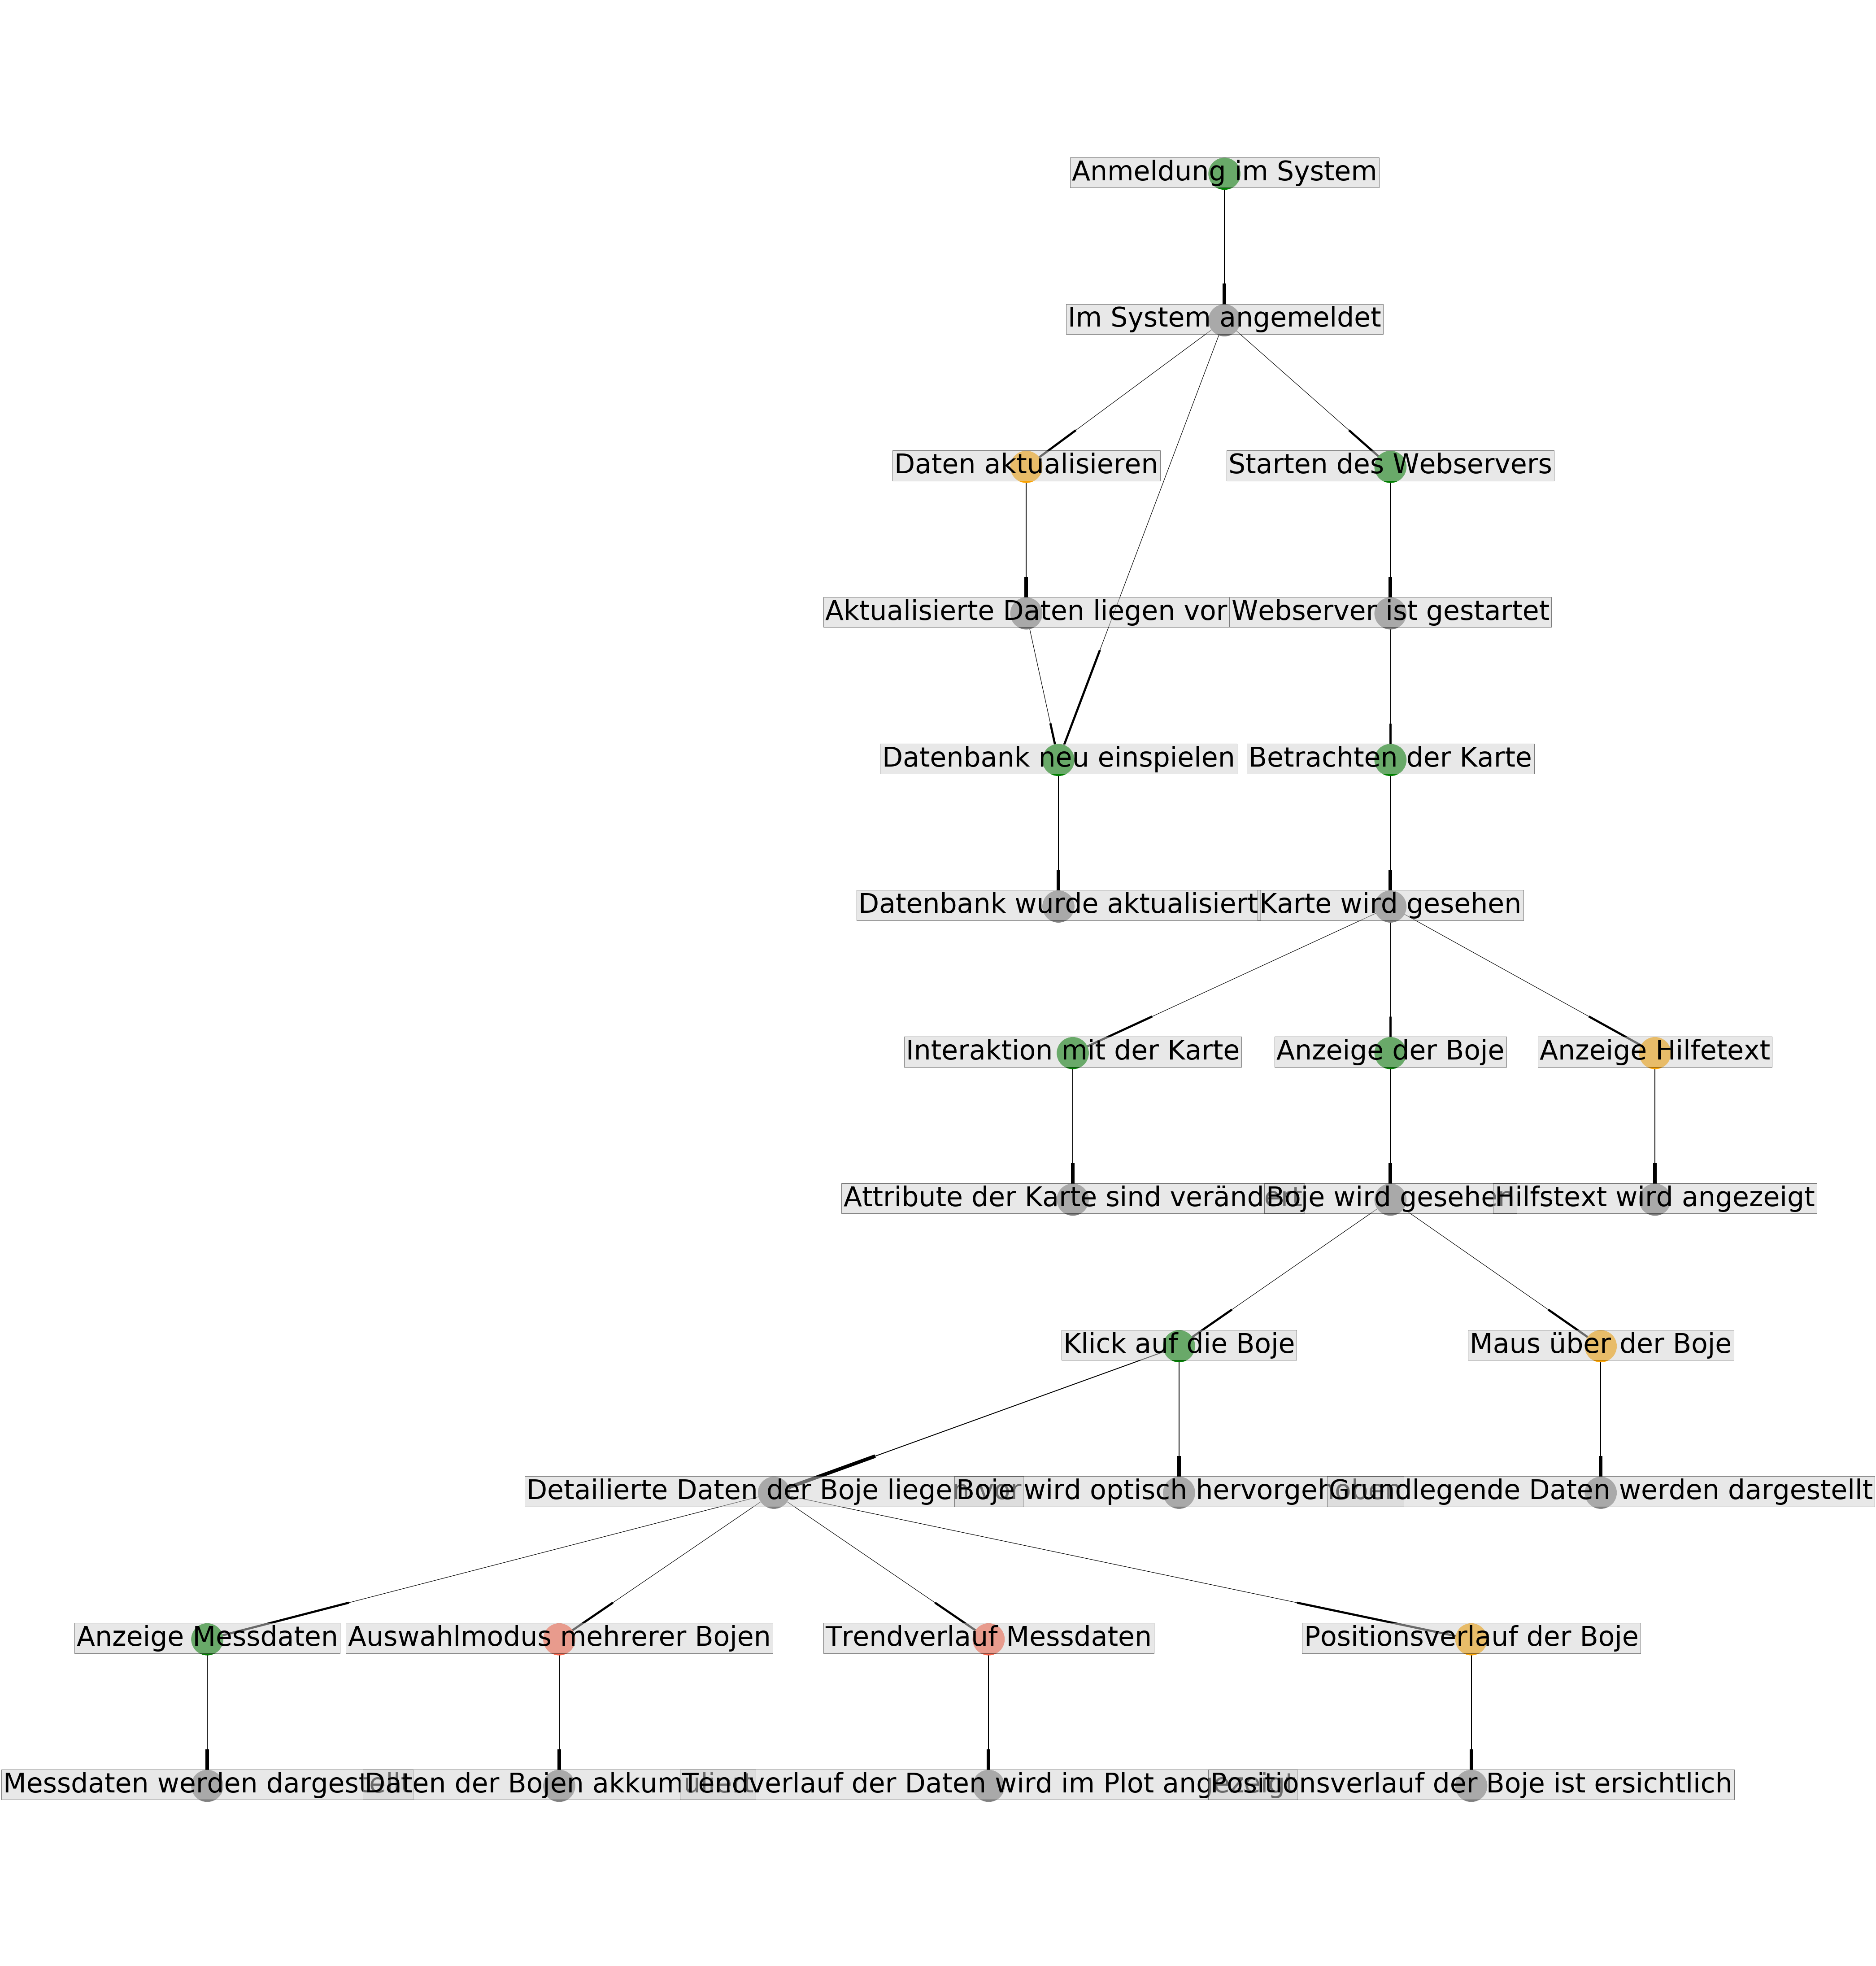

In [4]:
unpack = lambda cell: [c[1:-1] for c in cell.split("|")]
G = nx.DiGraph()

for i, row in anforderungen.iterrows():
    titel = row['Titel']
    prio =  row['Priorität']
    
    vorbedingungen = "" if pd.isnull(row['Vorbedingungen']) else unpack(row['Vorbedingungen'])
    nachbedingungen = unpack(row['Nachbedingungen'])
    
    G.add_node(titel, typ='anforderung', color=color_map[prio])
    
    for b in nachbedingungen:
        G.add_node(b, typ='zustand', color='grey')
        G.add_edge(b, titel, weight=2, arrowsize=2.0)
        
    for b in vorbedingungen:
        if b not in G:
            G.add_node(b, typ='zustand',color='grey')
        G.add_edge(titel, b, weight=1.2, arrowsize=2.0)
        
G = G.reverse()

pos=graphviz_layout(G, prog='dot')



colors = [nx.get_node_attributes(G,'color')[g] for g in G]
alpha = [0.2 if nx.get_node_attributes(G,'typ')[g] == 'zustand' else 1.0 for g in G]
weights = [G[u][v]['weight'] for u,v in G.edges()]

        
plt.figure(3,figsize=(70,80)) 
plt.axis('off')
nx.draw_networkx(G, pos, node_color=colors, with_labels=False, 
                 node_size=5000,edge_cmap=plt.cm.Reds, arrows=True,width=weights)

for n in G:
    x,y = pos[n]    
    plt.text(x,y-3,s=n, bbox=dict(facecolor='lightgray', alpha=0.5),
             horizontalalignment='center',
             color='black', fontsize=60)
plt.show()      

In [7]:
unpack = lambda cell: [c[1:-1] for c in cell.split("|")]

anforderungen_ = [row['Titel'] for i, row in anforderungen.iterrows()]
nachbedingungen_ = [unpack(row['Nachbedingungen']) for i, row in anforderungen.iterrows()]
vorbedingungen_ =  ["" if pd.isnull(row['Vorbedingungen']) else unpack(row['Vorbedingungen']) for i, row in anforderungen.iterrows()]

flat_nachbedingungen = [item for sublist in nachbedingungen_ for item in sublist]
flat_vorbedingungen = [item for sublist in nachbedingungen_ for item in sublist]


G = nx.DiGraph()
G.add_nodes_from(anforderungen_)
G.add_nodes_from(flat_nachbedingungen)

A = G.subgraph(anforderungen_)
N = G.subgraph(flat_nachbedingungen)

for i, a in enumerate(anforderungen_):
    ## Zeichne kanten von den Anforderungen zu ihren auswirkungen
    for n in nachbedingungen_[i]:
        G.add_edge(n,a, weight=1000)
    ## Zeichne kanten von den Vorbedingungen zu den dazu gehörigen Abhängigkeiten
    for v in vorbedingungen_[i]:
        G.add_edge(a,v, weight=0.0001)

G = G.reverse()
A = A.reverse()
n = N.reverse()

pos=graphviz_layout(G, prog='dot')


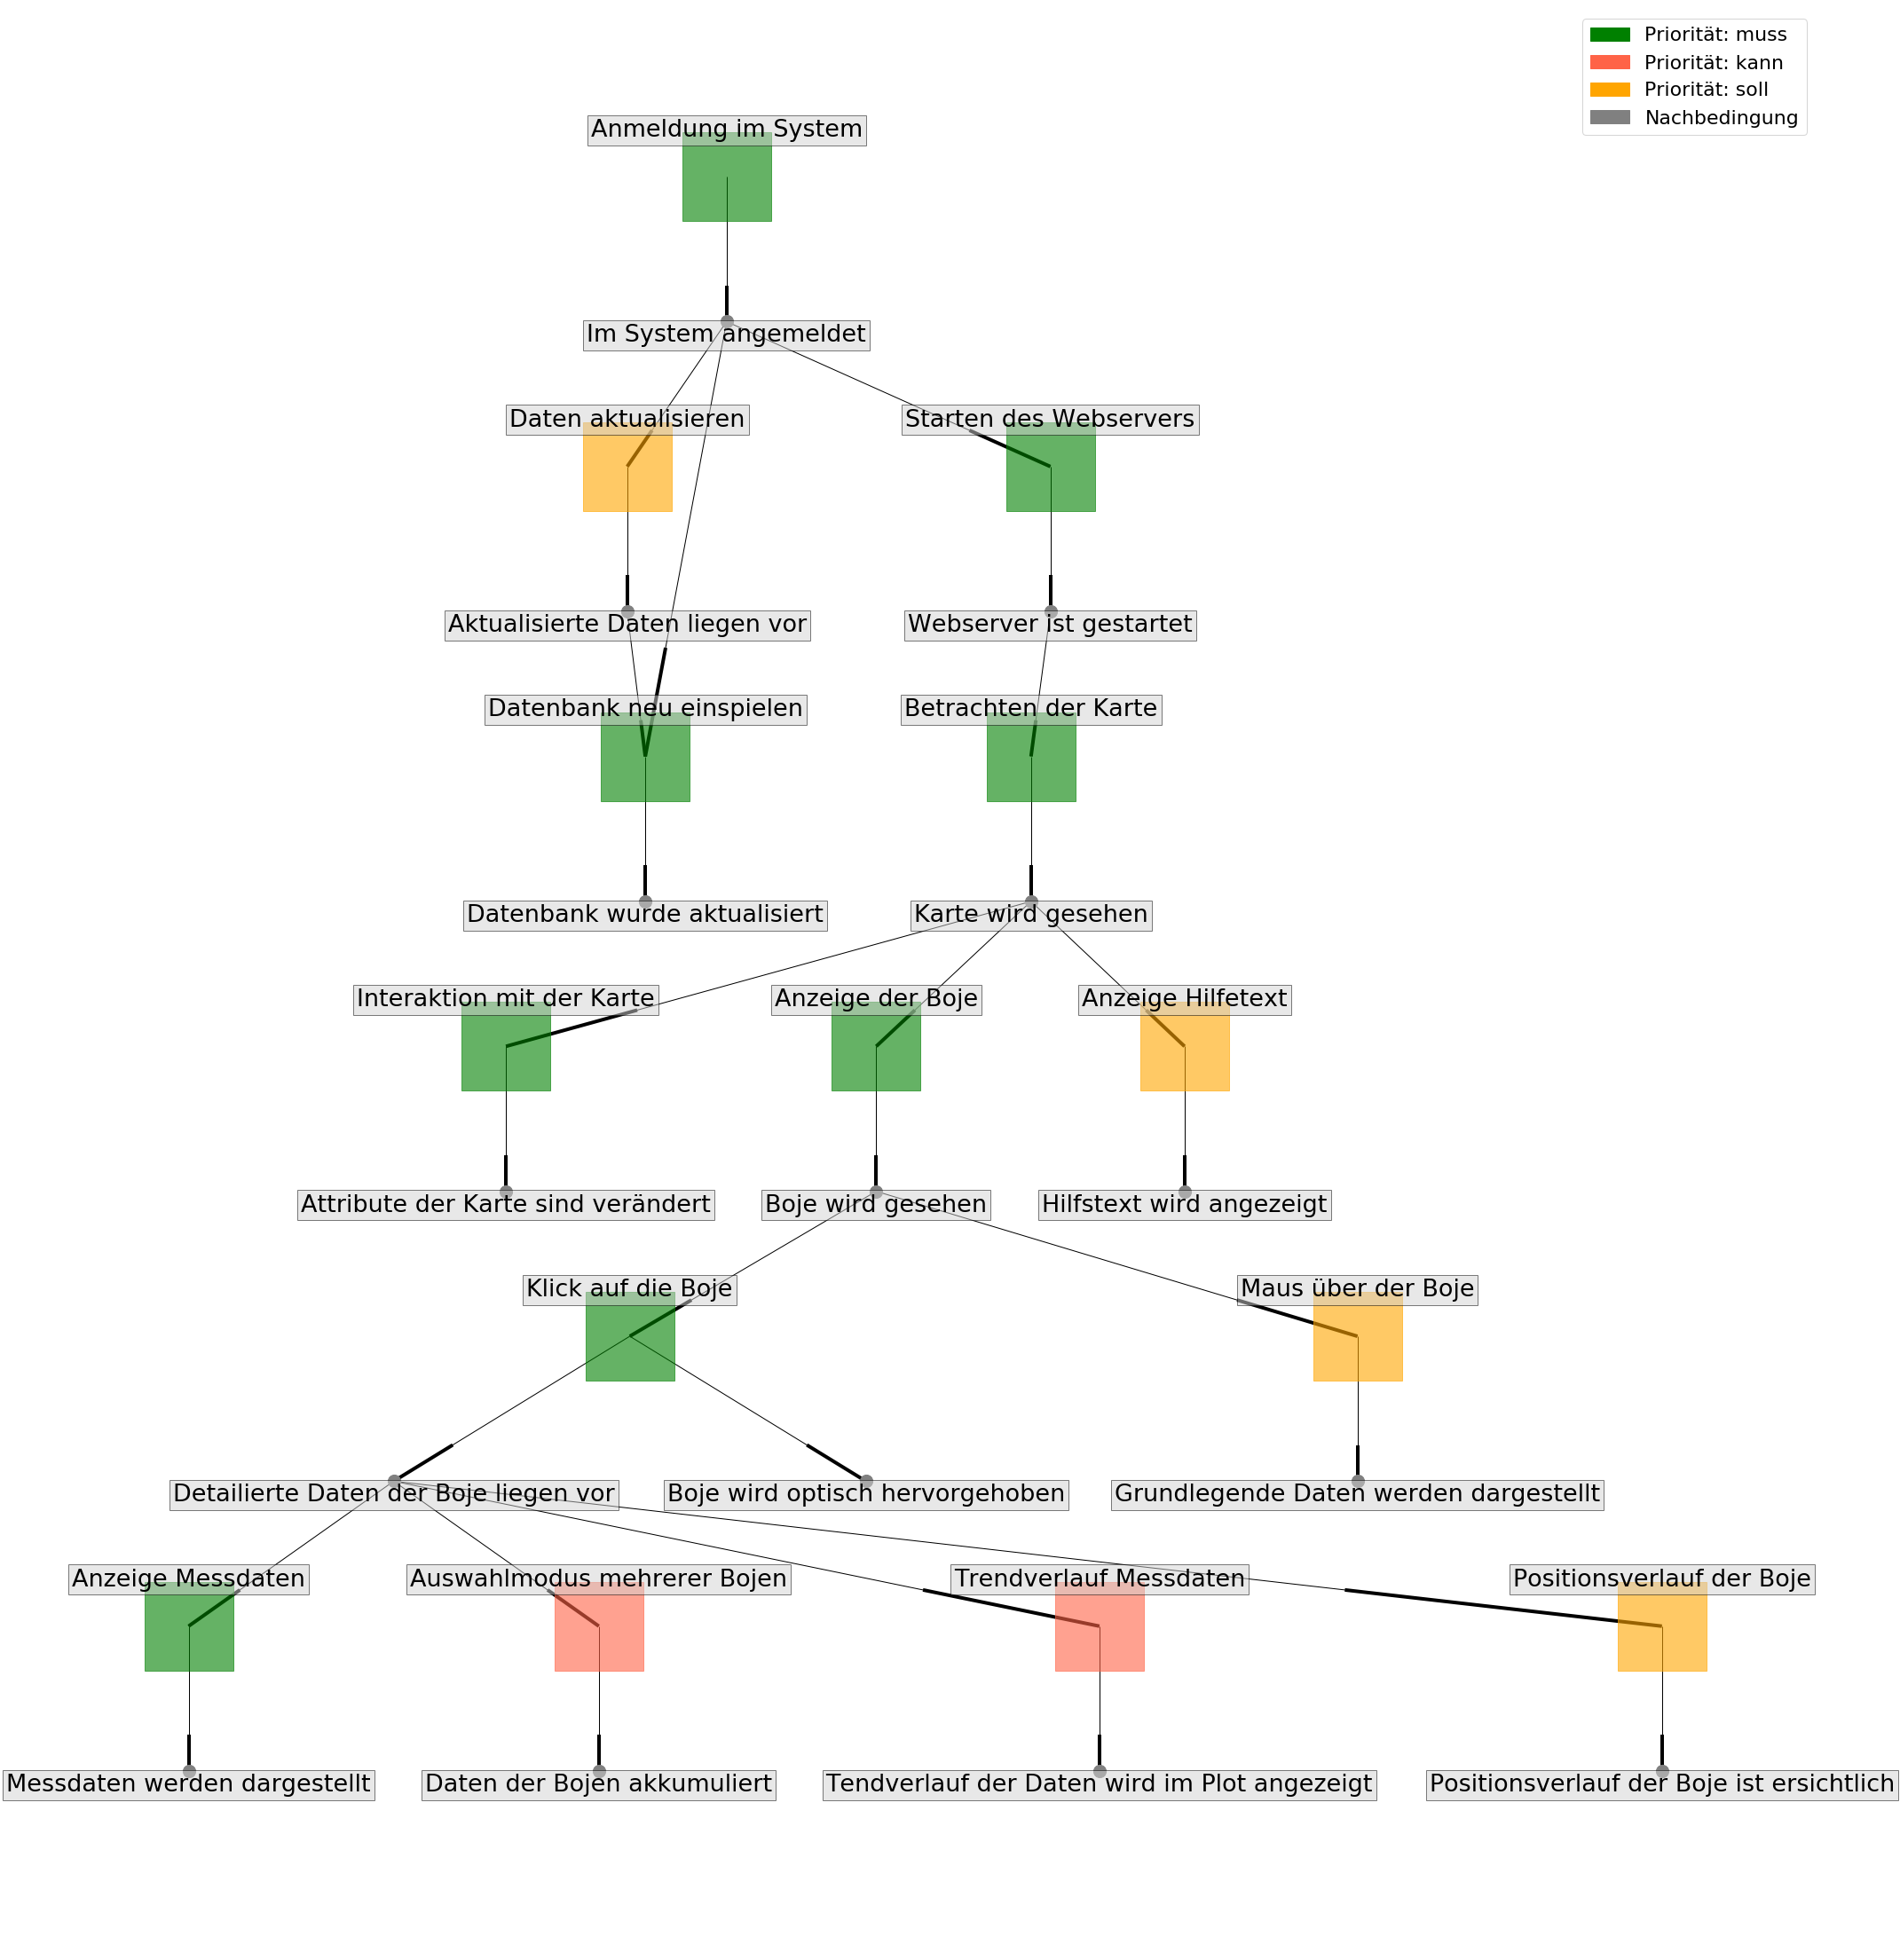

In [8]:
     
plt.figure(3,figsize=(36,40)) 
plt.axis('off')

color = [color_map[row['Priorität']] for i, row in anforderungen.iterrows()]

nx.draw_networkx_nodes(A, pos, node_shape='s', node_size=10000, node_color=color, alpha=0.6, label=True)
nx.draw_networkx_nodes(N, pos, node_shape='o', node_size=200, node_color='grey')
nx.draw_networkx_edges(G, pos, node_shape='o')

x_centr = np.average([p[0] for p in pos.values()])

fontsize = 10

def shift_x(x):
    align_map = {
        -1: 'left',
        1: 'right'
    }
    s = 1 if x < x_centr else -1      
    return (align_map[s], x - (s*7))

def shift_y(y):
    return (y + 20)

def position_string(node):
    x,y = pos[node]
    align, x = shift_x(x) if False in N else ('center', x)
    y = y-10 if  node in N else y
    y = shift_y(y) if node in A else y
    return (align,x,y) 

for n in G:    
    align,x,y = position_string(n) 
            
    plt.text(x,y,s=n, bbox=dict(facecolor='lightgray', alpha=0.5),
             horizontalalignment=align,
             color='black', fontsize=27)

plt.rcParams["legend.fontsize"] = 22
plt.legend(handles=[
    mpatches.Patch(color=color_map['muss'], label='Priorität: muss'),
    mpatches.Patch(color=color_map['kann'], label='Priorität: kann'),
    mpatches.Patch(color=color_map['soll'], label='Priorität: soll'),
    mpatches.Ellipse((1,1), 4, 0, fill=True, label='Nachbedingung', color='grey')
    
])

plt.show()  


In [7]:
A

In [8]:
if 'Boje wird optisch hervorgehoben' in N:
    print(1)

1


# Erstellen des $\LaTeX$ codes zur Tabellarischen Darstellung

In [9]:
for n in G:
    print(n in N)

False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
